In [2]:
import numpy as np
import pandas as pd
import scanpy as sc
import anndata as ad

In [3]:
import muon as mu

In [4]:
# Import a module with ATAC-seq-related functions
from muon import atac as ac

In [5]:
import seaborn as sns 

In [6]:
dfonefivzerog = pd.read_csv('/corgi/filippe/FromHome/corranalysis/df150hvgenesandtf.csv')
dfonefivzerog

,Unnamed: 0,ARNT,MECOM,RORA,RORA.1,SOX5,TBP,HLTF,REST,NR4A2,...,NR4A1,PBX2,PKNOX1,PRDM1,SPI1,SREBF1.1,TCF7,USF2,ZNF263,CREM
0,Arnt_MA0004.1,-0.002889,0.024367,0.019711,0.019711,0.020302,0.004580,0.010026,0.022862,-0.000699,...,0.011809,0.001364,0.027585,0.041966,0.009699,0.020946,0.020893,0.017969,0.003929,0.020235
1,Mecom_MA0029.1,0.010146,-0.017442,0.040997,0.040997,-0.086414,0.009032,-0.007052,-0.008135,0.008017,...,0.010284,0.016736,-0.011958,0.006756,-0.030045,-0.006436,0.074700,-0.018187,0.002699,-0.018918
2,RORA_MA0071.1,-0.001878,-0.002048,0.039485,0.039485,-0.011201,-0.004362,0.004174,-0.006714,0.012989,...,0.000964,0.009217,-0.029592,0.029166,0.000947,-0.025993,-0.021191,0.007286,0.012481,-0.025858
3,RORA(var.2)_MA0072.1,-0.027390,0.011870,0.040631,0.040631,0.048941,-0.017590,0.010908,0.001252,-0.019378,...,-0.010293,0.003850,0.009496,0.070598,0.006600,-0.009001,0.014045,-0.005100,0.003561,-0.005761
4,Sox5_MA0087.1,0.010943,-0.000972,0.071020,0.071020,-0.126447,-0.006174,-0.012035,-0.006361,0.023345,...,0.000790,-0.000367,-0.008721,0.053469,-0.024328,-0.004372,0.084146,-0.012289,-0.005876,-0.028198
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,SREBF1(var.2)_MA0829.2,0.009985,0.006664,-0.031903,-0.031903,0.029484,0.011626,0.018899,0.005910,0.003273,...,0.015030,0.013669,0.006654,-0.023999,0.020476,-0.014319,-0.068928,-0.009061,-0.013564,0.011405
146,TCF7_MA0769.2,-0.019108,-0.004832,0.173542,0.173542,-0.132758,-0.016137,-0.046871,0.001203,0.017792,...,-0.010437,-0.017499,-0.020723,0.021780,-0.095786,0.004306,0.267358,-0.038422,0.013744,-0.016285
147,USF2_MA0526.3,0.002447,-0.002792,-0.007266,-0.007266,0.035287,0.003825,-0.001418,0.010661,-0.008881,...,0.000015,0.010836,-0.009177,0.023564,0.023668,-0.010417,-0.042366,0.014231,-0.009816,0.008903
148,ZNF263_MA0528.2,0.016838,-0.014451,-0.009821,-0.009821,-0.080297,0.000532,-0.021055,-0.002062,-0.000116,...,-0.003637,-0.011512,-0.016324,-0.023012,-0.016064,0.001600,-0.004902,0.001641,0.011203,-0.000751


In [11]:
dfonefivzerog.index = list(dfonefivzerog['Unnamed: 0'])

In [13]:
# del dfonefivzerog['Unnamed: 0']

In [25]:
firstq = dfonefivzerog.iloc[0:75, 0:75]
firstq

,ARNT,MECOM,RORA,RORA.1,SOX5,TBP,HLTF,REST,NR4A2,FOS,...,TP63,TP53,MTF1,ELK1,HESX1,FOXK1,MYC,MYB,NFIC,PBX3
Arnt_MA0004.1,-0.002889,0.024367,0.019711,0.019711,0.020302,0.004580,0.010026,0.022862,-0.000699,0.025238,...,-0.000610,0.016291,-0.021888,0.014855,0.014358,0.019151,0.003613,0.035395,0.011619,-0.002425
Mecom_MA0029.1,0.010146,-0.017442,0.040997,0.040997,-0.086414,0.009032,-0.007052,-0.008135,0.008017,0.037123,...,0.005532,-0.017468,-0.009169,-0.010118,0.004410,-0.001579,0.009484,-0.000620,0.014927,0.019451
RORA_MA0071.1,-0.001878,-0.002048,0.039485,0.039485,-0.011201,-0.004362,0.004174,-0.006714,0.012989,-0.011855,...,-0.007562,-0.014974,0.013273,0.012877,0.000557,-0.013166,0.014212,-0.000693,0.012389,-0.006365
RORA(var.2)_MA0072.1,-0.027390,0.011870,0.040631,0.040631,0.048941,-0.017590,0.010908,0.001252,-0.019378,-0.003706,...,0.023445,-0.007545,0.014520,-0.005100,-0.000280,-0.009305,-0.014351,0.005032,-0.009667,-0.026285
Sox5_MA0087.1,0.010943,-0.000972,0.071020,0.071020,-0.126447,-0.006174,-0.012035,-0.006361,0.023345,0.015901,...,-0.013557,0.004886,-0.024235,-0.005145,-0.007865,-0.003333,0.003825,0.019207,-0.000739,-0.005881
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
FOXK1_MA0852.2,-0.040375,-0.006006,0.064309,0.064309,-0.048582,-0.000633,-0.031824,-0.002438,-0.025299,0.011928,...,-0.001590,-0.025617,-0.012068,-0.001906,-0.009807,-0.013345,-0.026709,0.007238,0.026810,-0.024535
MYC_MA0147.3,-0.006329,0.004381,0.017743,0.017743,0.004841,0.002472,0.006998,0.015967,0.020164,0.023528,...,-0.007538,0.006219,-0.012632,0.014109,0.010690,0.011986,0.019335,0.007811,0.005099,-0.016106
MYB_MA0100.3,0.003928,-0.003104,0.018175,0.018175,0.000776,-0.007355,0.008609,0.000454,-0.012364,0.023322,...,-0.016310,-0.017488,-0.003862,-0.011918,-0.006812,-0.010973,-0.000292,0.018600,0.016479,-0.012554
NFIC_MA0161.2,0.004737,0.006522,-0.032430,-0.032430,-0.023931,0.014020,-0.011772,-0.022700,-0.016993,-0.016428,...,-0.006380,0.006923,0.007140,0.014325,0.005080,-0.005301,-0.006170,-0.005445,0.004329,-0.002487


In [27]:
secndq = dfonefivzerog.iloc[0:75, 75:150]
secndq

,RELB,TEAD2,TFDP1,ZBTB7A,ZNF24,ZNF384,ZNF282,GATA3,VDR,IRF3,...,NR4A1,PBX2,PKNOX1,PRDM1,SPI1,SREBF1.1,TCF7,USF2,ZNF263,CREM
Arnt_MA0004.1,0.018145,0.015970,0.039084,0.027429,0.004329,0.011398,-0.001719,0.005204,0.043751,0.010765,...,0.011809,0.001364,0.027585,0.041966,0.009699,0.020946,0.020893,0.017969,0.003929,0.020235
Mecom_MA0029.1,-0.002508,0.004150,-0.031894,-0.004224,-0.000105,-0.001697,0.008687,0.047724,-0.027696,0.000804,...,0.010284,0.016736,-0.011958,0.006756,-0.030045,-0.006436,0.074700,-0.018187,0.002699,-0.018918
RORA_MA0071.1,-0.000764,-0.014406,-0.014999,0.020882,0.005314,-0.007916,-0.003439,-0.007666,-0.002572,0.006275,...,0.000964,0.009217,-0.029592,0.029166,0.000947,-0.025993,-0.021191,0.007286,0.012481,-0.025858
RORA(var.2)_MA0072.1,-0.016852,0.005428,0.013053,0.006287,-0.007374,-0.000980,0.008549,0.017026,0.046104,-0.009074,...,-0.010293,0.003850,0.009496,0.070598,0.006600,-0.009001,0.014045,-0.005100,0.003561,-0.005761
Sox5_MA0087.1,0.008268,-0.010985,-0.022320,0.012315,-0.021213,-0.006582,0.007551,0.046382,0.007593,-0.013738,...,0.000790,-0.000367,-0.008721,0.053469,-0.024328,-0.004372,0.084146,-0.012289,-0.005876,-0.028198
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
FOXK1_MA0852.2,-0.032393,0.000913,-0.024358,-0.013004,-0.020197,-0.006570,-0.007721,0.049733,0.036497,-0.024755,...,-0.021058,0.004002,-0.014554,0.058641,-0.022151,0.014809,0.099078,-0.007115,-0.003495,-0.005334
MYC_MA0147.3,0.018101,0.010947,0.010371,0.030035,0.000083,0.005292,0.010401,0.007736,0.029078,0.006101,...,0.012467,-0.003235,0.015629,0.047107,-0.001465,0.017024,0.019212,0.007960,0.009344,0.004752
MYB_MA0100.3,-0.004162,-0.006806,0.010543,-0.016525,0.003096,-0.005783,-0.020169,0.013599,0.021601,-0.000142,...,-0.002626,0.000063,0.010369,0.028738,0.004934,-0.009075,-0.002039,0.003071,-0.000381,-0.009024
NFIC_MA0161.2,-0.007969,0.003665,-0.004501,0.008529,0.006837,0.001788,-0.008388,-0.026566,0.006327,-0.013935,...,-0.004116,0.004942,-0.000410,-0.012949,-0.014476,-0.012293,-0.039577,-0.002833,0.006048,-0.028003


In [30]:
thirdq = dfonefivzerog.iloc[75:150, 0:75]
thirdq

,ARNT,MECOM,RORA,RORA.1,SOX5,TBP,HLTF,REST,NR4A2,FOS,...,TP63,TP53,MTF1,ELK1,HESX1,FOXK1,MYC,MYB,NFIC,PBX3
RELB_MA1117.1,0.001779,0.014728,-0.035647,-0.035647,-0.067246,0.002480,-0.023715,-0.022776,-0.000131,-0.021176,...,0.035635,0.016478,-0.008646,-0.009241,-0.005857,-0.001383,0.029019,-0.009041,-0.001284,-0.025001
TEAD2_MA1121.1,0.013847,0.001756,-0.025253,-0.025253,-0.037515,-0.000748,-0.004006,-0.018275,0.019587,0.000191,...,-0.009973,-0.012942,-0.008749,-0.006956,-0.000535,-0.013006,0.010153,-0.004211,-0.004921,-0.001652
TFDP1_MA1122.1,0.003856,-0.012307,0.103160,0.103160,-0.094582,-0.008414,0.009493,0.007598,0.026099,0.075229,...,-0.001369,-0.014582,-0.010454,0.010758,-0.013731,-0.006069,-0.019827,0.043023,0.031105,0.013643
ZBTB7A_MA0750.2,0.004807,0.002147,0.141207,0.141207,-0.198935,0.008720,-0.032446,-0.023537,0.076062,0.073544,...,-0.044073,-0.022799,-0.011819,-0.003344,-0.008907,0.001235,0.019228,0.009819,0.039446,0.026245
ZNF24_MA1124.1,0.017042,0.010375,-0.044469,-0.044469,0.080344,-0.014069,0.031241,-0.003284,-0.028053,-0.013913,...,0.032456,0.007981,0.000398,0.011277,-0.005558,-0.003183,0.006790,0.006070,-0.012048,0.019052
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SREBF1(var.2)_MA0829.2,0.009985,0.006664,-0.031903,-0.031903,0.029484,0.011626,0.018899,0.005910,0.003273,-0.012745,...,-0.008827,0.002562,-0.009110,-0.007106,0.009800,-0.004529,0.001167,-0.006795,-0.003208,0.006001
TCF7_MA0769.2,-0.019108,-0.004832,0.173542,0.173542,-0.132758,-0.016137,-0.046871,0.001203,0.017792,0.055144,...,-0.012268,-0.027539,-0.003532,-0.010441,-0.005994,0.009382,-0.019309,0.058581,0.048075,-0.010569
USF2_MA0526.3,0.002447,-0.002792,-0.007266,-0.007266,0.035287,0.003825,-0.001418,0.010661,-0.008881,-0.004663,...,-0.007152,-0.002515,0.007370,0.008039,0.029995,0.007068,-0.004933,0.007402,0.007014,-0.022219
ZNF263_MA0528.2,0.016838,-0.014451,-0.009821,-0.009821,-0.080297,0.000532,-0.021055,-0.002062,-0.000116,0.001852,...,-0.025852,0.010381,0.015274,-0.018119,-0.004452,-0.013278,0.013273,-0.011977,-0.006660,0.021991


In [31]:
fourq = dfonefivzerog.iloc[75:150, 75:150]
fourq

,RELB,TEAD2,TFDP1,ZBTB7A,ZNF24,ZNF384,ZNF282,GATA3,VDR,IRF3,...,NR4A1,PBX2,PKNOX1,PRDM1,SPI1,SREBF1.1,TCF7,USF2,ZNF263,CREM
RELB_MA1117.1,0.054349,0.003864,-0.022204,-0.005238,0.007019,-0.015475,-0.004207,-0.039262,-0.022144,-0.010021,...,0.033766,-0.016836,-0.010550,-0.013497,-0.012318,0.006572,-0.071755,-0.016954,-0.007883,-0.005853
TEAD2_MA1121.1,0.005471,-0.001727,-0.023228,0.002687,0.009544,-0.017340,-0.009955,-0.013804,-0.014977,-0.028538,...,0.012233,-0.008586,-0.021420,-0.000468,-0.024237,-0.004211,-0.031986,-0.021686,0.011239,-0.027431
TFDP1_MA1122.1,-0.025635,0.011761,-0.004951,0.009173,-0.007043,-0.006141,0.003391,0.061637,0.004766,-0.013079,...,-0.020647,-0.006977,-0.004145,0.067091,-0.025890,0.009936,0.143814,-0.005149,0.007300,-0.004783
ZBTB7A_MA0750.2,-0.030933,-0.009499,-0.055649,0.004493,-0.004742,-0.025907,0.021400,0.122206,-0.006124,0.022406,...,-0.000388,0.003495,-0.031000,0.037183,-0.088984,0.017902,0.183827,-0.026556,-0.002755,-0.012832
ZNF24_MA1124.1,0.031675,-0.000398,0.036879,-0.001807,-0.003424,-0.006251,-0.014049,-0.032048,0.009406,-0.002390,...,0.000533,0.001227,0.023153,-0.011124,0.032578,-0.012422,-0.049208,0.018304,0.000359,0.032211
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SREBF1(var.2)_MA0829.2,0.019483,0.000837,0.016895,-0.000998,0.012403,0.010299,0.000083,-0.025257,-0.008907,0.019594,...,0.015030,0.013669,0.006654,-0.023999,0.020476,-0.014319,-0.068928,-0.009061,-0.013564,0.011405
TCF7_MA0769.2,-0.019912,-0.011362,-0.047084,0.009710,-0.018790,-0.014390,-0.000603,0.126950,0.006429,-0.001249,...,-0.010437,-0.017499,-0.020723,0.021780,-0.095786,0.004306,0.267358,-0.038422,0.013744,-0.016285
USF2_MA0526.3,0.022953,0.001341,0.006886,0.018148,-0.004031,0.002541,0.001910,0.001103,0.036821,0.011071,...,0.000015,0.010836,-0.009177,0.023564,0.023668,-0.010417,-0.042366,0.014231,-0.009816,0.008903
ZNF263_MA0528.2,-0.013165,-0.003205,-0.024838,-0.012034,-0.001567,-0.022301,0.001964,-0.005650,-0.023682,-0.011550,...,-0.003637,-0.011512,-0.016324,-0.023012,-0.016064,0.001600,-0.004902,0.001641,0.011203,-0.000751


In [21]:
dfonefivzerog

,ARNT,MECOM,RORA,RORA.1,SOX5,TBP,HLTF,REST,NR4A2,FOS,...,NR4A1,PBX2,PKNOX1,PRDM1,SPI1,SREBF1.1,TCF7,USF2,ZNF263,CREM
Arnt_MA0004.1,-0.002889,0.024367,0.019711,0.019711,0.020302,0.004580,0.010026,0.022862,-0.000699,0.025238,...,0.011809,0.001364,0.027585,0.041966,0.009699,0.020946,0.020893,0.017969,0.003929,0.020235
Mecom_MA0029.1,0.010146,-0.017442,0.040997,0.040997,-0.086414,0.009032,-0.007052,-0.008135,0.008017,0.037123,...,0.010284,0.016736,-0.011958,0.006756,-0.030045,-0.006436,0.074700,-0.018187,0.002699,-0.018918
RORA_MA0071.1,-0.001878,-0.002048,0.039485,0.039485,-0.011201,-0.004362,0.004174,-0.006714,0.012989,-0.011855,...,0.000964,0.009217,-0.029592,0.029166,0.000947,-0.025993,-0.021191,0.007286,0.012481,-0.025858
RORA(var.2)_MA0072.1,-0.027390,0.011870,0.040631,0.040631,0.048941,-0.017590,0.010908,0.001252,-0.019378,-0.003706,...,-0.010293,0.003850,0.009496,0.070598,0.006600,-0.009001,0.014045,-0.005100,0.003561,-0.005761
Sox5_MA0087.1,0.010943,-0.000972,0.071020,0.071020,-0.126447,-0.006174,-0.012035,-0.006361,0.023345,0.015901,...,0.000790,-0.000367,-0.008721,0.053469,-0.024328,-0.004372,0.084146,-0.012289,-0.005876,-0.028198
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SREBF1(var.2)_MA0829.2,0.009985,0.006664,-0.031903,-0.031903,0.029484,0.011626,0.018899,0.005910,0.003273,-0.012745,...,0.015030,0.013669,0.006654,-0.023999,0.020476,-0.014319,-0.068928,-0.009061,-0.013564,0.011405
TCF7_MA0769.2,-0.019108,-0.004832,0.173542,0.173542,-0.132758,-0.016137,-0.046871,0.001203,0.017792,0.055144,...,-0.010437,-0.017499,-0.020723,0.021780,-0.095786,0.004306,0.267358,-0.038422,0.013744,-0.016285
USF2_MA0526.3,0.002447,-0.002792,-0.007266,-0.007266,0.035287,0.003825,-0.001418,0.010661,-0.008881,-0.004663,...,0.000015,0.010836,-0.009177,0.023564,0.023668,-0.010417,-0.042366,0.014231,-0.009816,0.008903
ZNF263_MA0528.2,0.016838,-0.014451,-0.009821,-0.009821,-0.080297,0.000532,-0.021055,-0.002062,-0.000116,0.001852,...,-0.003637,-0.011512,-0.016324,-0.023012,-0.016064,0.001600,-0.004902,0.001641,0.011203,-0.000751


<AxesSubplot:>

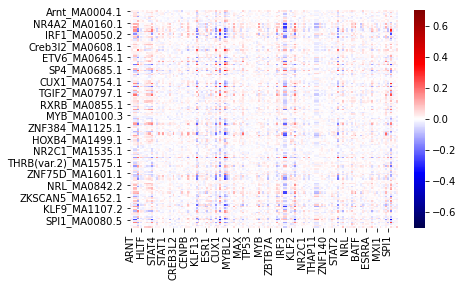

In [16]:
sns.heatmap(dfonefivzerog, cmap = 'seismic', vmin=-0.7, vmax=0.7)

<AxesSubplot:>

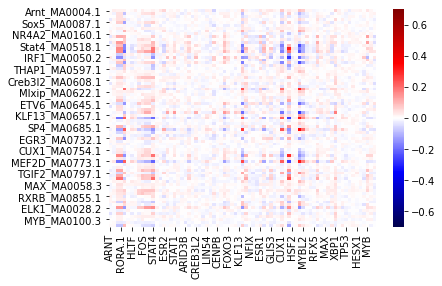

In [26]:
sns.heatmap(firstq, cmap = 'seismic', vmin=-0.7, vmax=0.7)

In [15]:
#list(dfonefivzerog['Unnamed: 0'])

<AxesSubplot:>

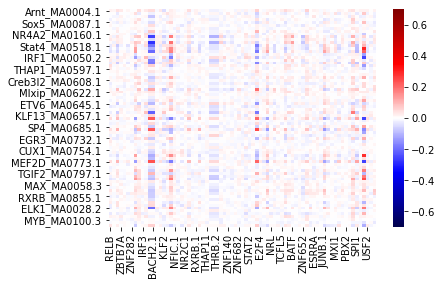

In [28]:
#secndq
sns.heatmap(secndq, cmap = 'seismic', vmin=-0.7, vmax=0.7)

<AxesSubplot:>

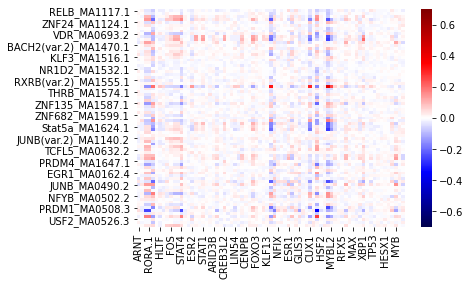

In [32]:
sns.heatmap(thirdq, cmap = 'seismic', vmin=-0.7, vmax=0.7)

<AxesSubplot:>

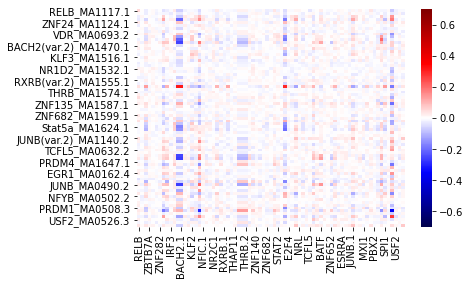

In [33]:
sns.heatmap(fourq, cmap = 'seismic', vmin=-0.7, vmax=0.7)

In [75]:
fourq[fourq['BACH2'] > 0.2]

,RELB,TEAD2,TFDP1,ZBTB7A,ZNF24,ZNF384,ZNF282,GATA3,VDR,IRF3,...,NR4A1,PBX2,PKNOX1,PRDM1,SPI1,SREBF1.1,TCF7,USF2,ZNF263,CREM
SNAI3_MA1559.1,0.039115,-0.006317,0.132777,-0.016091,0.007368,0.025532,0.009771,-0.104413,0.098979,-0.001,...,-0.027742,0.015574,0.061135,0.015866,0.132437,-0.010202,-0.180833,0.030152,-0.032549,0.032862


In [35]:
toptwenty = dfonefivzerog.iloc[0:20 , 0:20]
toptwenty

,ARNT,MECOM,RORA,RORA.1,SOX5,TBP,HLTF,REST,NR4A2,FOS,JUN,JUN.1,STAT4,TCF7L2,ELK4,ESR2,IRF1,NFE2L2,STAT1,SREBF1
Arnt_MA0004.1,-0.002889,0.024367,0.019711,0.019711,0.020302,0.004580,0.010026,0.022862,-0.000699,0.025238,0.009975,0.009975,0.017034,0.008337,0.030086,0.057057,-0.004305,0.011102,0.000585,0.020946
Mecom_MA0029.1,0.010146,-0.017442,0.040997,0.040997,-0.086414,0.009032,-0.007052,-0.008135,0.008017,0.037123,0.038292,0.038292,0.059881,0.010816,0.006487,-0.014167,0.015356,0.015294,0.017107,-0.006436
RORA_MA0071.1,-0.001878,-0.002048,0.039485,0.039485,-0.011201,-0.004362,0.004174,-0.006714,0.012989,-0.011855,-0.009950,-0.009950,0.023244,-0.005648,-0.014803,-0.020810,0.009610,0.018177,0.025397,-0.025993
RORA(var.2)_MA0072.1,-0.027390,0.011870,0.040631,0.040631,0.048941,-0.017590,0.010908,0.001252,-0.019378,-0.003706,-0.015930,-0.015930,0.011739,0.007877,0.000653,0.007421,-0.024673,0.009914,0.001158,-0.009001
Sox5_MA0087.1,0.010943,-0.000972,0.071020,0.071020,-0.126447,-0.006174,-0.012035,-0.006361,0.023345,0.015901,0.046231,0.046231,0.066281,0.021623,0.000086,-0.021187,0.005114,-0.007324,-0.014865,-0.004372
TBP_MA0108.2,-0.005331,0.006437,-0.007054,-0.007054,0.012826,-0.006806,-0.006341,-0.011234,-0.026137,0.010594,-0.041054,-0.041054,-0.005012,0.010133,-0.022148,0.000620,-0.004254,-0.004700,-0.009027,-0.013682
HLTF_MA0109.1,-0.006440,0.005998,0.023563,0.023563,0.016002,0.005805,0.020269,-0.008792,0.002663,0.029439,0.019002,0.019002,0.020369,0.011683,0.016801,0.019644,-0.000668,-0.010420,-0.005289,-0.007461
REST_MA0138.2,0.018178,0.002082,-0.012276,-0.012276,0.099507,0.021213,0.014977,0.033996,-0.002551,-0.001745,-0.033549,-0.033549,-0.020903,0.000008,0.008371,0.046893,-0.005591,-0.018839,-0.005166,-0.010403
NR4A2_MA0160.1,0.011055,-0.002156,-0.007606,-0.007606,0.005630,-0.004058,0.007908,0.008582,0.015278,-0.002488,-0.004861,-0.004861,-0.024542,-0.005581,-0.010684,-0.004371,0.005698,0.015485,0.017709,-0.012545
FOS_MA0476.1,-0.037364,0.029759,0.110975,0.110975,0.101826,0.002245,-0.008100,-0.012315,0.008616,0.012855,0.012361,0.012361,0.076532,0.009468,-0.023494,-0.002889,0.009349,-0.003109,0.021047,0.011966


<AxesSubplot:>

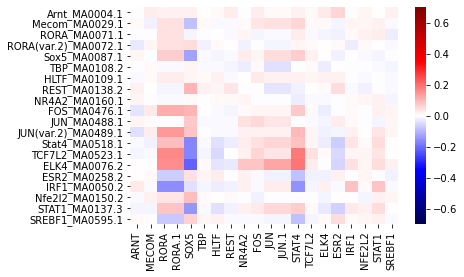

In [36]:
sns.heatmap(toptwenty, cmap = 'seismic', vmin=-0.7, vmax=0.7)

In [40]:
dfonefivzerog.index

Index(['Arnt_MA0004.1', 'Mecom_MA0029.1', 'RORA_MA0071.1',
       'RORA(var.2)_MA0072.1', 'Sox5_MA0087.1', 'TBP_MA0108.2',
       'HLTF_MA0109.1', 'REST_MA0138.2', 'NR4A2_MA0160.1', 'FOS_MA0476.1',
       ...
       'NR4A1_MA1112.2', 'PBX2_MA1113.2', 'PKNOX1_MA0782.2', 'PRDM1_MA0508.3',
       'SPI1_MA0080.5', 'SREBF1(var.2)_MA0829.2', 'TCF7_MA0769.2',
       'USF2_MA0526.3', 'ZNF263_MA0528.2', 'CREM_MA0609.2'],
      dtype='object', length=150)

In [43]:
collist = list(dfonefivzerog.columns)
indxlist = list(dfonefivzerog.index)

In [44]:
indxlist

['Arnt_MA0004.1',
 'Mecom_MA0029.1',
 'RORA_MA0071.1',
 'RORA(var.2)_MA0072.1',
 'Sox5_MA0087.1',
 'TBP_MA0108.2',
 'HLTF_MA0109.1',
 'REST_MA0138.2',
 'NR4A2_MA0160.1',
 'FOS_MA0476.1',
 'JUN_MA0488.1',
 'JUN(var.2)_MA0489.1',
 'Stat4_MA0518.1',
 'TCF7L2_MA0523.1',
 'ELK4_MA0076.2',
 'ESR2_MA0258.2',
 'IRF1_MA0050.2',
 'Nfe2l2_MA0150.2',
 'STAT1_MA0137.3',
 'SREBF1_MA0595.1',
 'THAP1_MA0597.1',
 'Arid3b_MA0601.1',
 'Arid5a_MA0602.1',
 'Atf1_MA0604.1',
 'Creb3l2_MA0608.1',
 'Foxj2_MA0614.1',
 'Gmeb1_MA0615.1',
 'LIN54_MA0619.1',
 'Mlxip_MA0622.1',
 'BHLHE41_MA0636.1',
 'CENPB_MA0637.1',
 'DBP_MA0639.1',
 'ETV6_MA0645.1',
 'FOXO3_MA0157.2',
 'HINFP_MA0131.2',
 'IRF9_MA0653.1',
 'KLF13_MA0657.1',
 'MEF2B_MA0660.1',
 'NFIA_MA0670.1',
 'NFIX_MA0671.1',
 'SP4_MA0685.1',
 'ZBTB18_MA0698.1',
 'ESR1_MA0112.3',
 'NR3C2_MA0727.1',
 'EGR3_MA0732.1',
 'GLIS3_MA0737.1',
 'ZNF143_MA0088.2',
 'ZNF410_MA0752.1',
 'CUX1_MA0754.1',
 'CUX2_MA0755.1',
 'LEF1_MA0768.1',
 'HSF2_MA0770.1',
 'MEF2D_MA0773.1',

In [59]:
corgtf = pd.DataFrame(data=dfonefivzerog.index, columns= ['TF_id'])
corgtf

,TF_id
0,Arnt_MA0004.1
1,Mecom_MA0029.1
2,RORA_MA0071.1
3,RORA(var.2)_MA0072.1
4,Sox5_MA0087.1
...,...
145,SREBF1(var.2)_MA0829.2
146,TCF7_MA0769.2
147,USF2_MA0526.3
148,ZNF263_MA0528.2


In [60]:
corgtf

,TF_id
0,Arnt_MA0004.1
1,Mecom_MA0029.1
2,RORA_MA0071.1
3,RORA(var.2)_MA0072.1
4,Sox5_MA0087.1
...,...
145,SREBF1(var.2)_MA0829.2
146,TCF7_MA0769.2
147,USF2_MA0526.3
148,ZNF263_MA0528.2


In [ ]:
#corgtf.index = 

In [57]:
#corgtf.rename({ 0:'TF_id'  }, inplace=True)

In [61]:
corgtf['Gene_id'] = collist

In [62]:
corgtf

,TF_id,Gene_id
0,Arnt_MA0004.1,ARNT
1,Mecom_MA0029.1,MECOM
2,RORA_MA0071.1,RORA
3,RORA(var.2)_MA0072.1,RORA.1
4,Sox5_MA0087.1,SOX5
...,...,...
145,SREBF1(var.2)_MA0829.2,SREBF1.1
146,TCF7_MA0769.2,TCF7
147,USF2_MA0526.3,USF2
148,ZNF263_MA0528.2,ZNF263


In [63]:
dfonefivzerog.iloc[0,0]

-0.0028888346045004

In [64]:
dfonefivzerog

,ARNT,MECOM,RORA,RORA.1,SOX5,TBP,HLTF,REST,NR4A2,FOS,...,NR4A1,PBX2,PKNOX1,PRDM1,SPI1,SREBF1.1,TCF7,USF2,ZNF263,CREM
Arnt_MA0004.1,-0.002889,0.024367,0.019711,0.019711,0.020302,0.004580,0.010026,0.022862,-0.000699,0.025238,...,0.011809,0.001364,0.027585,0.041966,0.009699,0.020946,0.020893,0.017969,0.003929,0.020235
Mecom_MA0029.1,0.010146,-0.017442,0.040997,0.040997,-0.086414,0.009032,-0.007052,-0.008135,0.008017,0.037123,...,0.010284,0.016736,-0.011958,0.006756,-0.030045,-0.006436,0.074700,-0.018187,0.002699,-0.018918
RORA_MA0071.1,-0.001878,-0.002048,0.039485,0.039485,-0.011201,-0.004362,0.004174,-0.006714,0.012989,-0.011855,...,0.000964,0.009217,-0.029592,0.029166,0.000947,-0.025993,-0.021191,0.007286,0.012481,-0.025858
RORA(var.2)_MA0072.1,-0.027390,0.011870,0.040631,0.040631,0.048941,-0.017590,0.010908,0.001252,-0.019378,-0.003706,...,-0.010293,0.003850,0.009496,0.070598,0.006600,-0.009001,0.014045,-0.005100,0.003561,-0.005761
Sox5_MA0087.1,0.010943,-0.000972,0.071020,0.071020,-0.126447,-0.006174,-0.012035,-0.006361,0.023345,0.015901,...,0.000790,-0.000367,-0.008721,0.053469,-0.024328,-0.004372,0.084146,-0.012289,-0.005876,-0.028198
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SREBF1(var.2)_MA0829.2,0.009985,0.006664,-0.031903,-0.031903,0.029484,0.011626,0.018899,0.005910,0.003273,-0.012745,...,0.015030,0.013669,0.006654,-0.023999,0.020476,-0.014319,-0.068928,-0.009061,-0.013564,0.011405
TCF7_MA0769.2,-0.019108,-0.004832,0.173542,0.173542,-0.132758,-0.016137,-0.046871,0.001203,0.017792,0.055144,...,-0.010437,-0.017499,-0.020723,0.021780,-0.095786,0.004306,0.267358,-0.038422,0.013744,-0.016285
USF2_MA0526.3,0.002447,-0.002792,-0.007266,-0.007266,0.035287,0.003825,-0.001418,0.010661,-0.008881,-0.004663,...,0.000015,0.010836,-0.009177,0.023564,0.023668,-0.010417,-0.042366,0.014231,-0.009816,0.008903
ZNF263_MA0528.2,0.016838,-0.014451,-0.009821,-0.009821,-0.080297,0.000532,-0.021055,-0.002062,-0.000116,0.001852,...,-0.003637,-0.011512,-0.016324,-0.023012,-0.016064,0.001600,-0.004902,0.001641,0.011203,-0.000751


In [66]:
acorlist = []
n = -1

for g in range(0, 150): 
    n += 1
    acorlist.append(dfonefivzerog.iloc[n,n])



In [67]:
acorlist

[-0.0028888346045004,
 -0.0174416487820658,
 0.0394854527712341,
 0.040631024449586,
 -0.1264465353140029,
 -0.0068058201968792,
 0.020269219803116,
 0.0339962409972814,
 0.0152775832400645,
 0.012855177607768,
 0.03777901155364,
 0.0193319392037168,
 0.0850501125054517,
 0.0412831154435754,
 -0.0041162619195452,
 0.0211057485855199,
 0.0832968830253595,
 -0.014651316947256,
 0.047818775368357,
 -0.0067032984502788,
 -0.0032003515286647,
 -0.0015768834901594,
 0.0059873534474721,
 -0.0038396443379684,
 0.02135234645915,
 0.0068136686556911,
 -0.0245915845995904,
 0.0390332268602634,
 0.0041105026797367,
 -0.0430585756927028,
 -0.0018333979199608,
 0.0091506417911348,
 0.0977446945578196,
 -0.0012812274529404,
 0.0036264114227638,
 0.0731903034396326,
 -0.0016132623611746,
 0.240130790330976,
 -0.0039698495399235,
 -0.0094834986248358,
 0.0280600921572763,
 -0.0264009300750969,
 0.0019510183619628,
 0.0184701787267694,
 0.0615861788963768,
 -0.0127330371006237,
 -0.0275037686685166,
 -0

In [68]:
corgtf

,TF_id,Gene_id
0,Arnt_MA0004.1,ARNT
1,Mecom_MA0029.1,MECOM
2,RORA_MA0071.1,RORA
3,RORA(var.2)_MA0072.1,RORA.1
4,Sox5_MA0087.1,SOX5
...,...,...
145,SREBF1(var.2)_MA0829.2,SREBF1.1
146,TCF7_MA0769.2,TCF7
147,USF2_MA0526.3,USF2
148,ZNF263_MA0528.2,ZNF263


In [69]:
corgtf['Correlation'] = acorlist

In [71]:
corgtf

,TF_id,Gene_id,Correlation
0,Arnt_MA0004.1,ARNT,-0.002889
1,Mecom_MA0029.1,MECOM,-0.017442
2,RORA_MA0071.1,RORA,0.039485
3,RORA(var.2)_MA0072.1,RORA.1,0.040631
4,Sox5_MA0087.1,SOX5,-0.126447
...,...,...,...
145,SREBF1(var.2)_MA0829.2,SREBF1.1,-0.014319
146,TCF7_MA0769.2,TCF7,0.267358
147,USF2_MA0526.3,USF2,0.014231
148,ZNF263_MA0528.2,ZNF263,0.011203


In [77]:
corgtf[corgtf['Gene_id'] == 'GMEB1']

,TF_id,Gene_id,Correlation
26,Gmeb1_MA0615.1,GMEB1,-0.024592


In [72]:
corgtf[corgtf['Correlation'] > 0.1]

,TF_id,Gene_id,Correlation
37,MEF2B_MA0660.1,MEF2B,0.240131
50,LEF1_MA0768.1,LEF1,0.288397
58,RUNX2_MA0511.2,RUNX2,0.120131
126,BATF_MA1634.1,BATF,0.132409
146,TCF7_MA0769.2,TCF7,0.267358


In [76]:
corgtf[corgtf['Correlation'] < -0.1]

,TF_id,Gene_id,Correlation
4,Sox5_MA0087.1,SOX5,-0.126447
86,BACH2_MA1101.2,BACH2,-0.258697
116,BCL6_MA0463.2,BCL6,-0.198724


In [ ]:
# kolmogorov smirnov test for normality!